# MDL Assignment - 2

## Team Number - 57
## Team Members - Siddik Ayyappa Naraharisetti (2020101089) and Sai Pranathi Kokkalla (2020101083)

Importing all the packages

In [389]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plot
import random
import pandas

Extracton of data from the pkl file, using pickle.load()

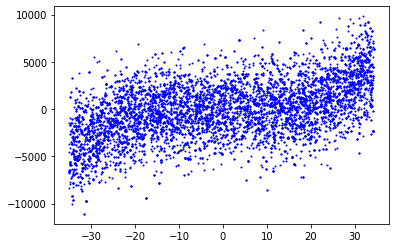

In [390]:
file = open('./train.pkl', 'rb') # make sure the mode is read. And reading must be done in binary.
load_data = pickle.load(file) # the data points are now contained in the load_data variable
number_data = len(load_data) # the length of the data set is in number_data
random.shuffle(load_data)
file.close()

file = open('./test.pkl', 'rb')
test_data_load = pickle.load(file)
number_test_data = len(test_data_load)



test_x = test_data_load[:, 0] # This is the x and y of the testing data sets
test_y = test_data_load[:, 1]


x = load_data[:, 0] # this is the x and y of the training data sets
y = load_data[:, 1]

plot.plot(x, y, 'b.', markersize = 2)


Now we have divided the data into 2 sets, x and y. Now it is time to resample the data.
### Task - 2.2.1: Re-Sampling the data

In [391]:
x_training_data_sets = []
y_training_data_sets = []
for i in range(0, 8000, 500):
    x_training_data_sets.append(x[i:i+500])
    y_training_data_sets.append(y[i:i+500])
    


Now at x_training_data_sets and y_training_data_sets we would be having the training sets delivered randomly.

### Task - 2.2.2 - Task
We shall  get the predicted values. We shall train the model using the training sets and 15 degrees per each training set. For each of them, we shall test it on the testing set. We shal compare the predictions and the actuality.

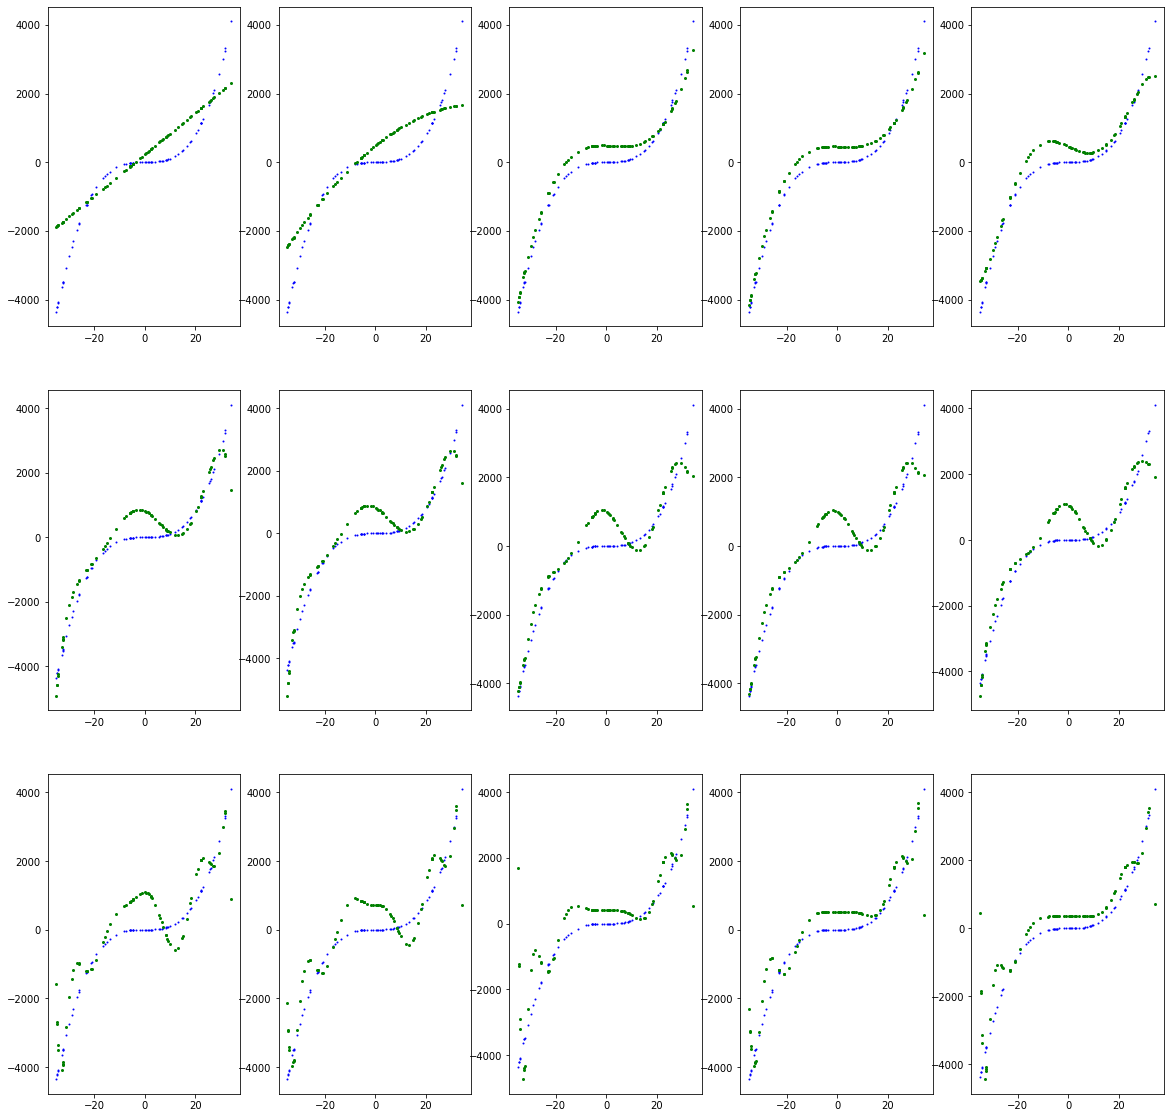

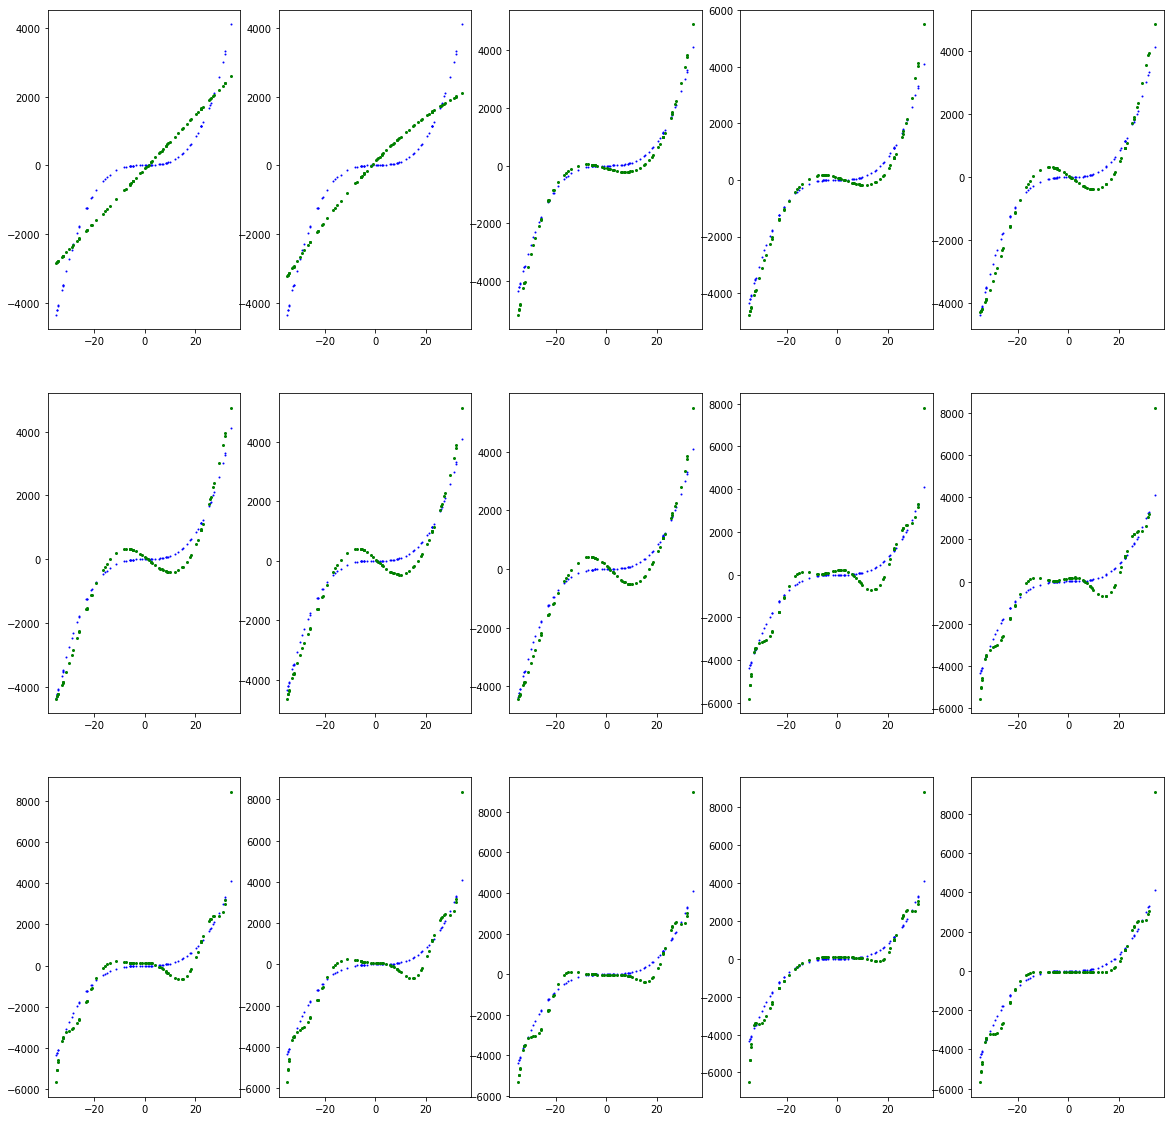

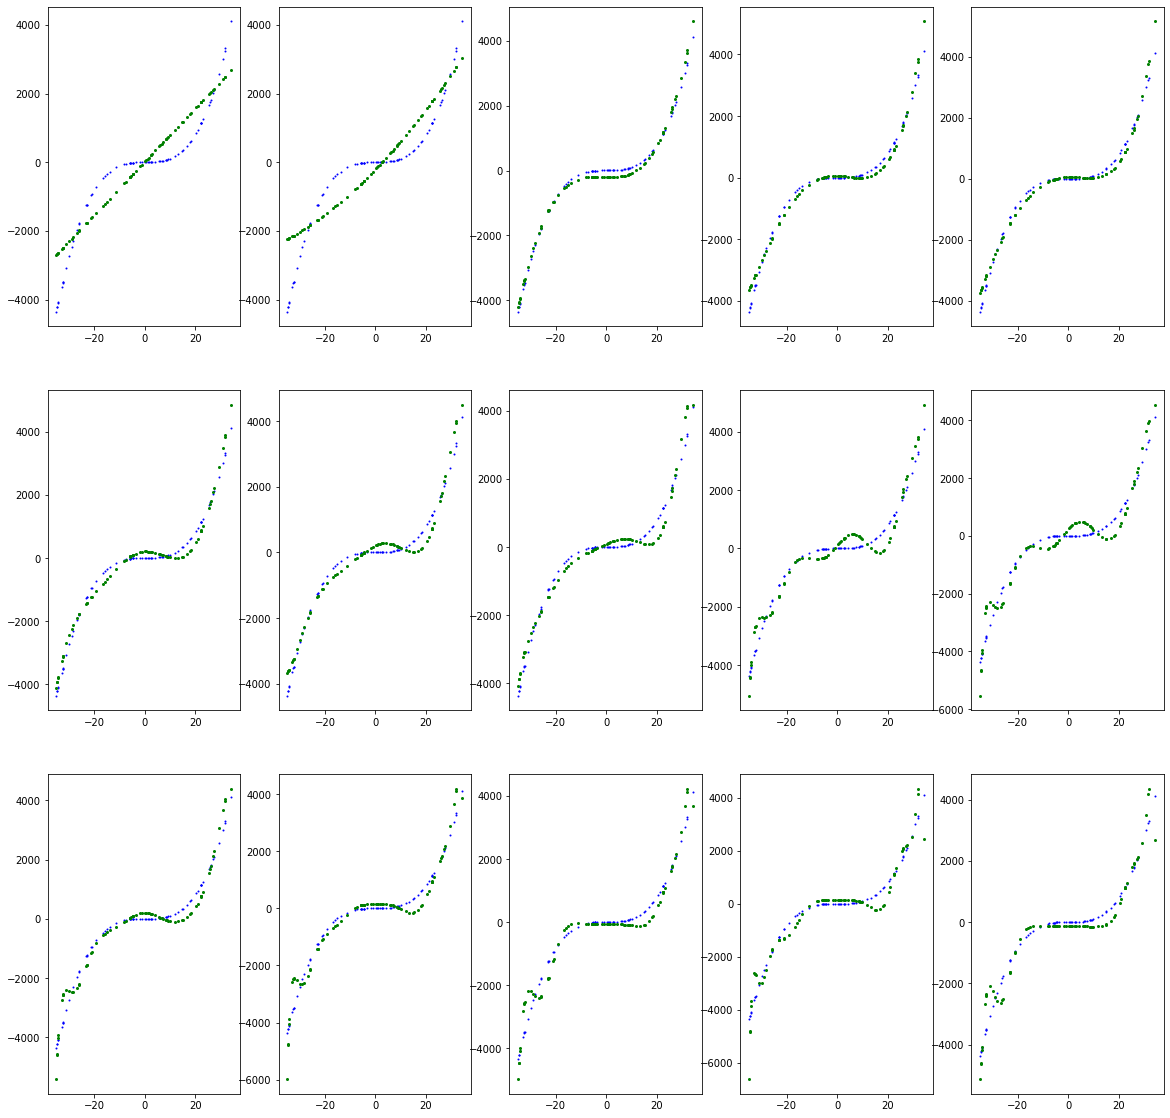

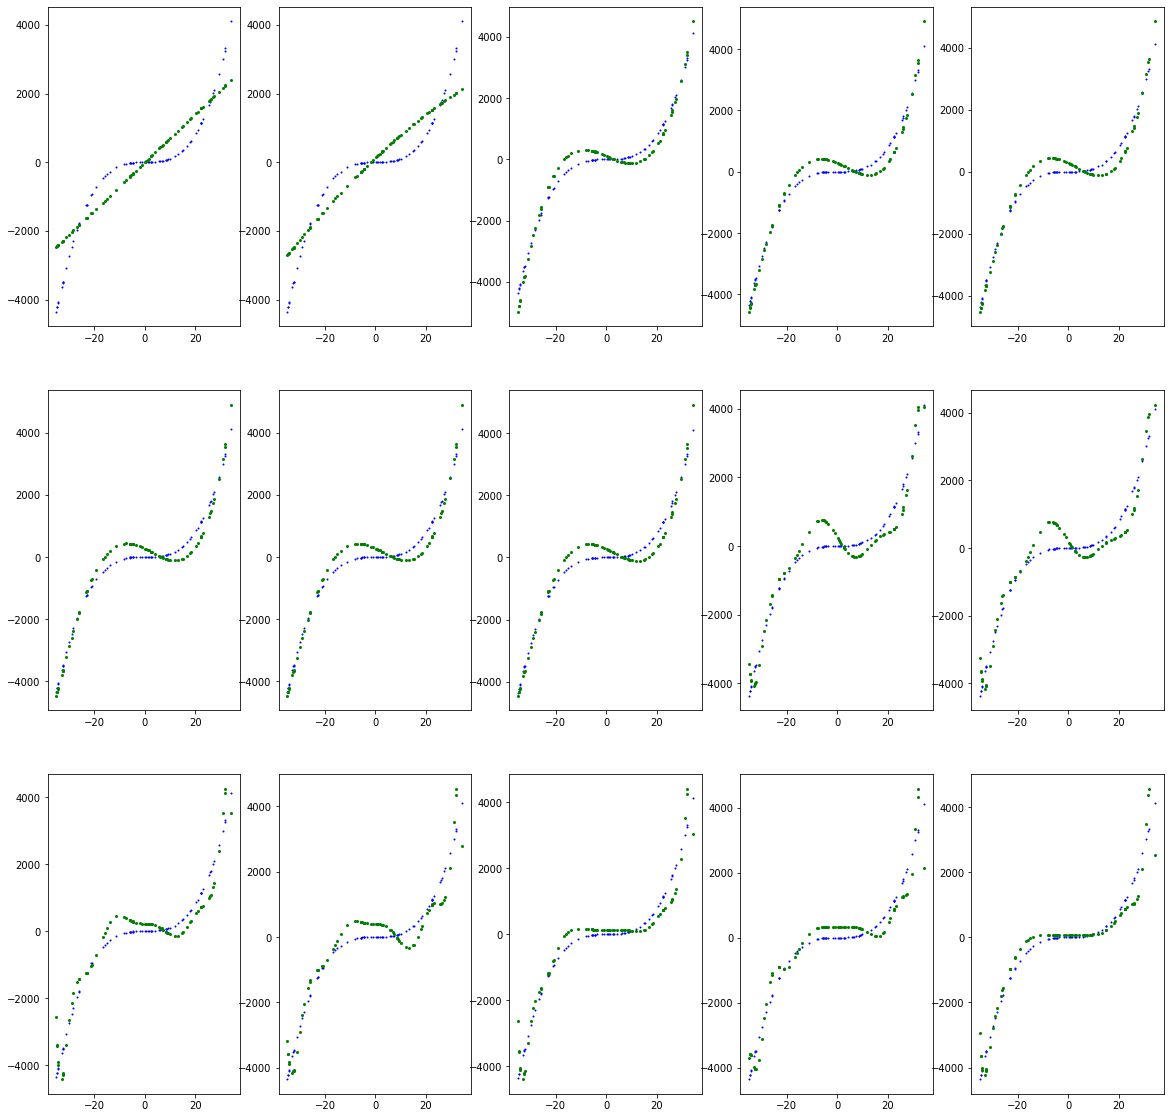

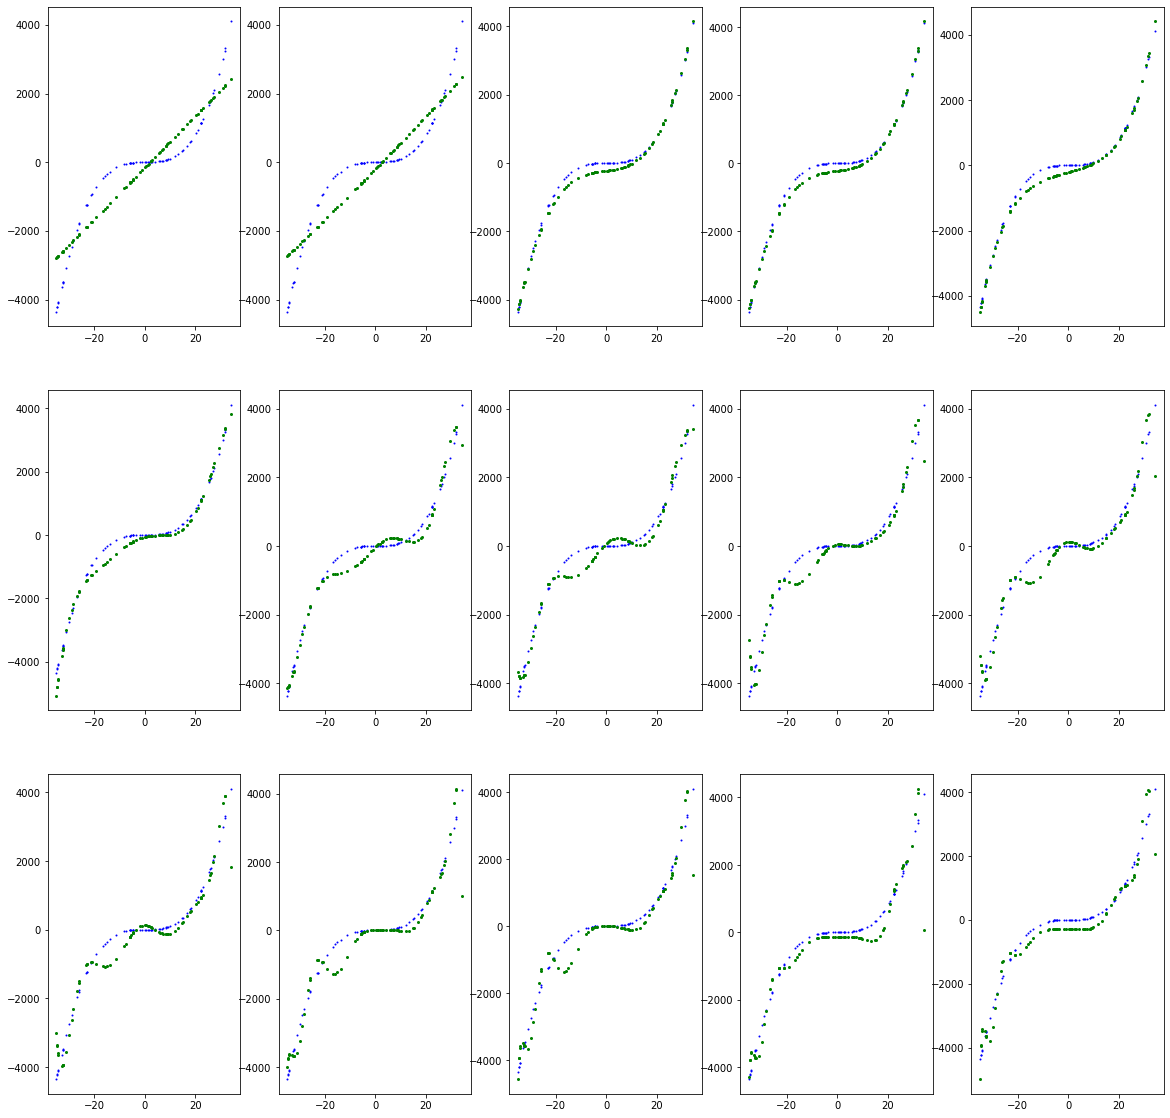

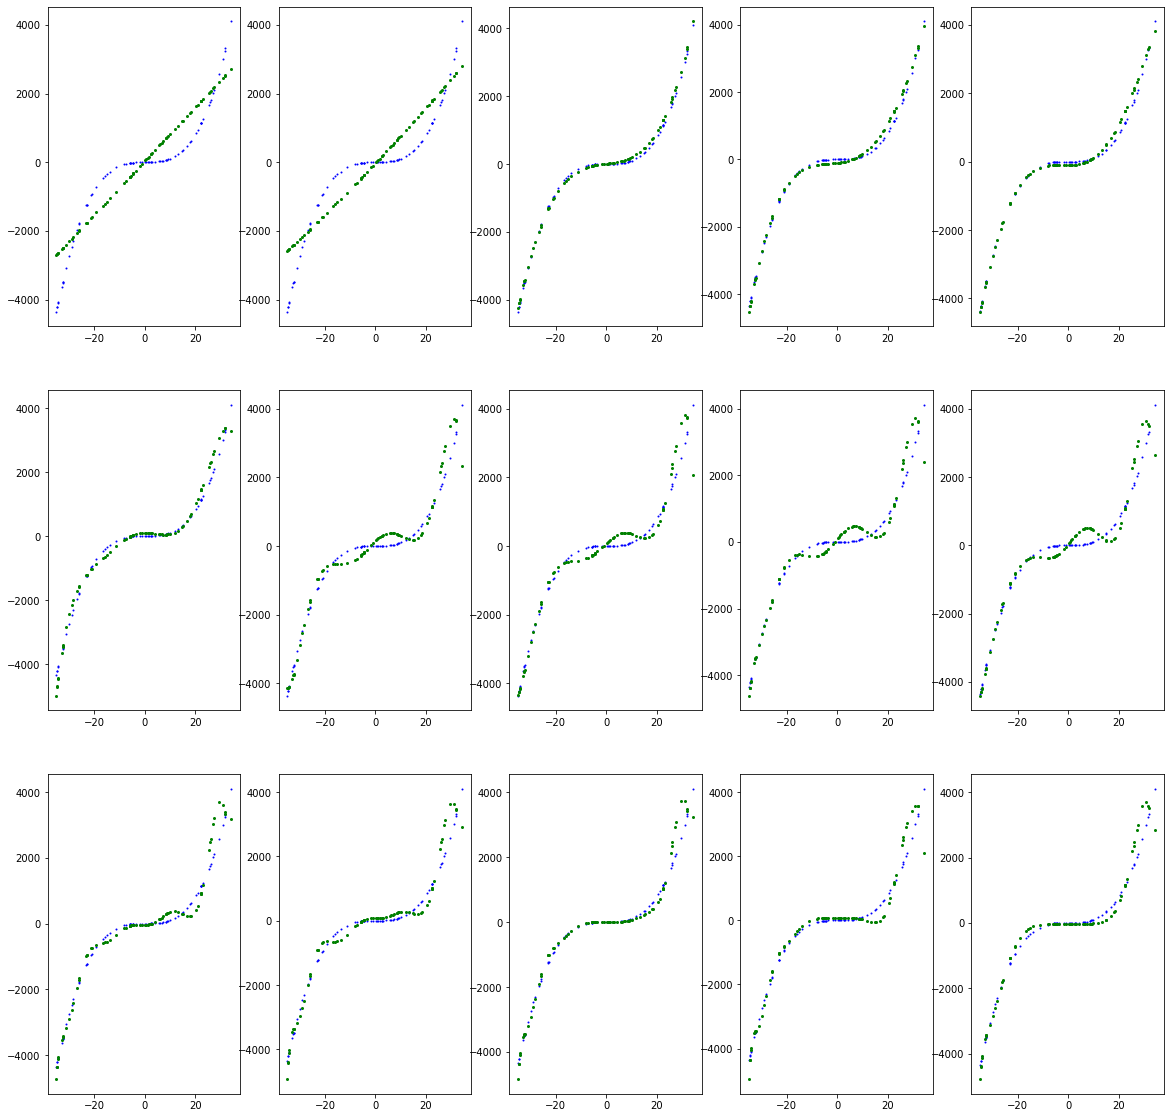

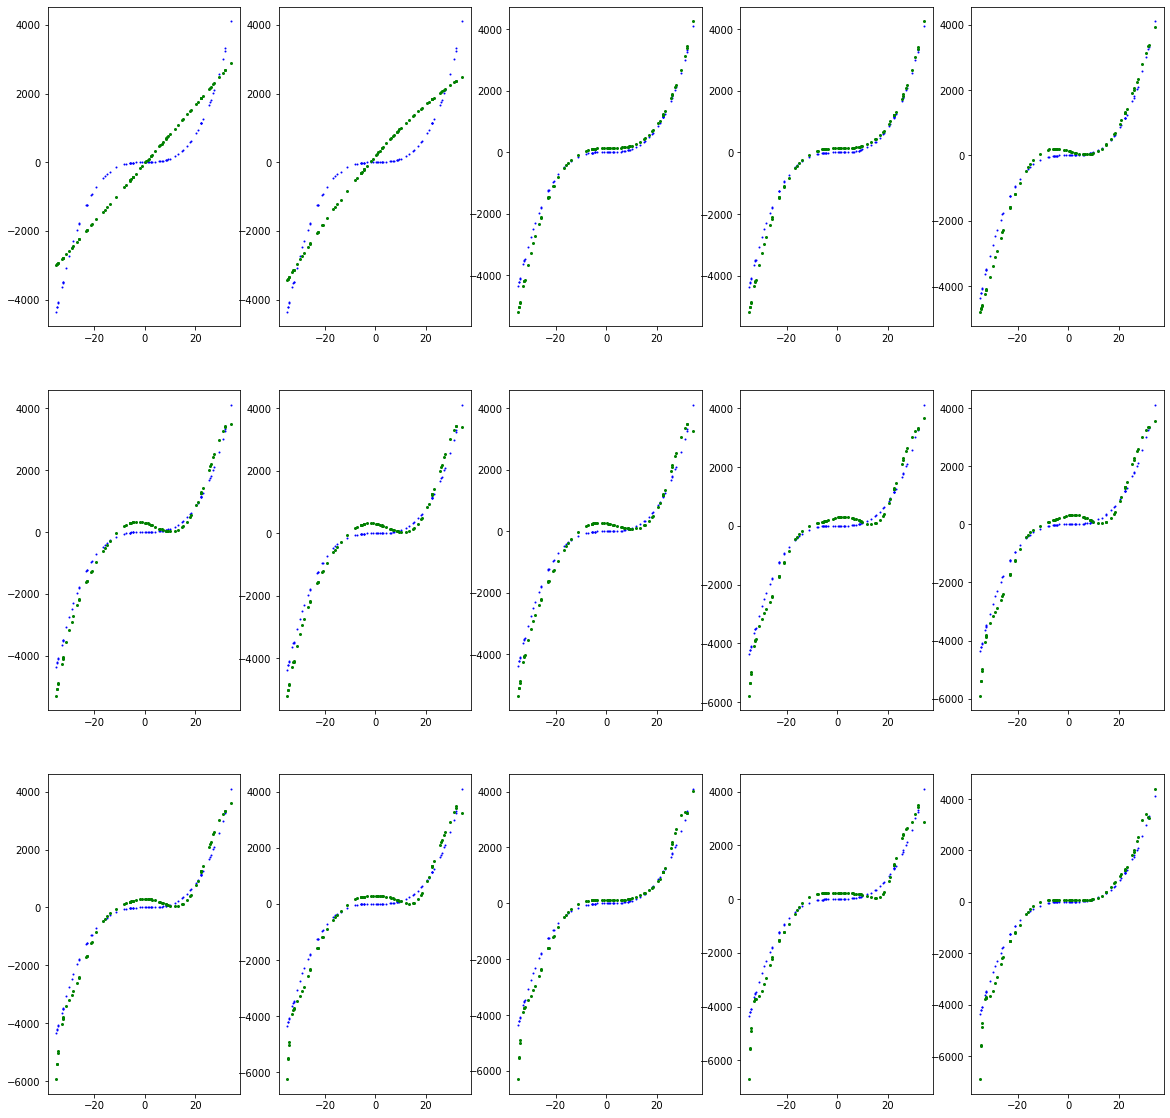

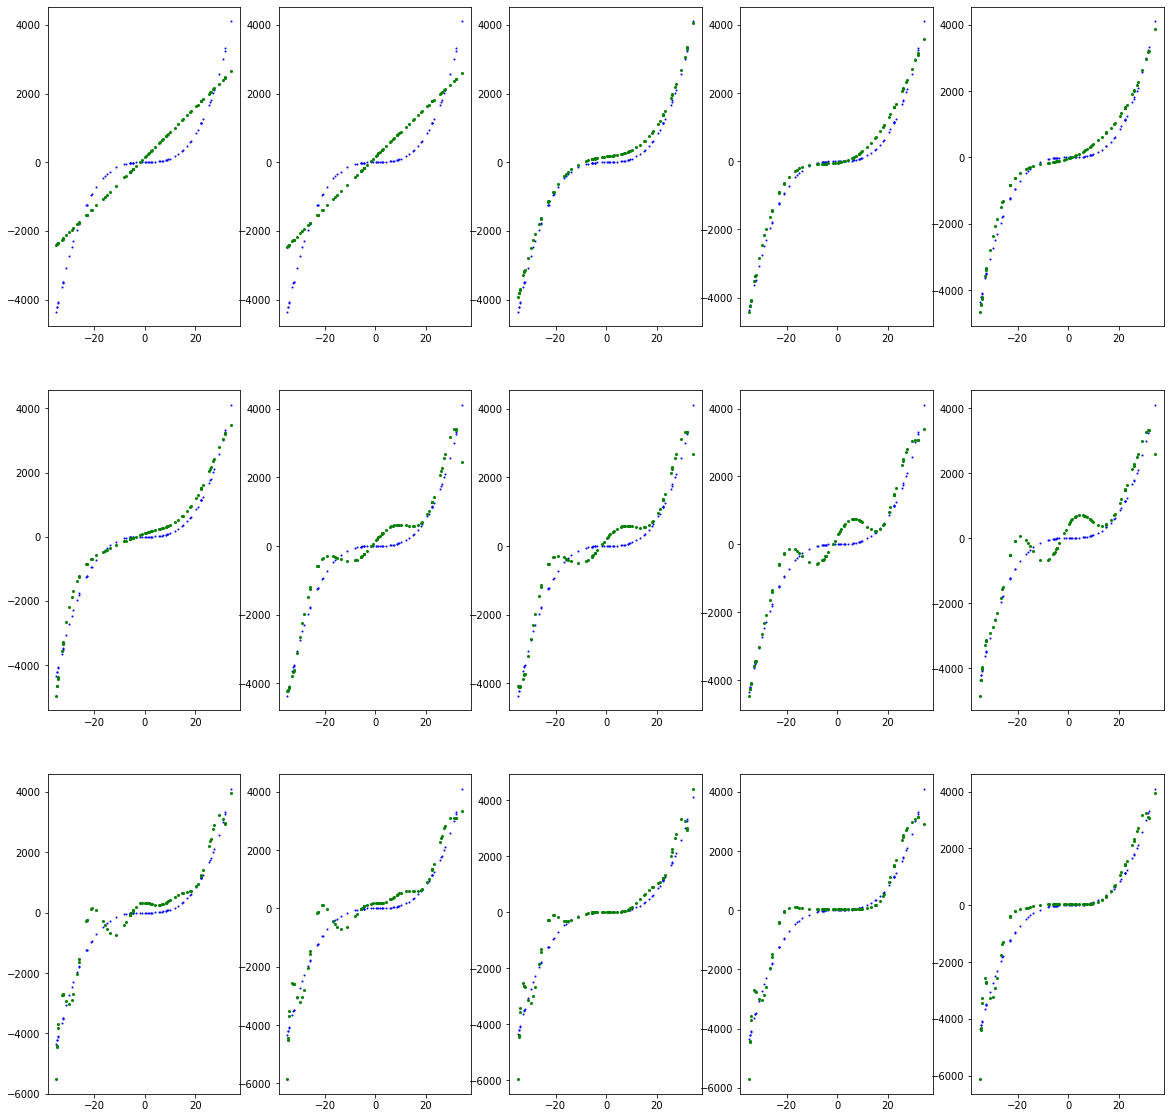

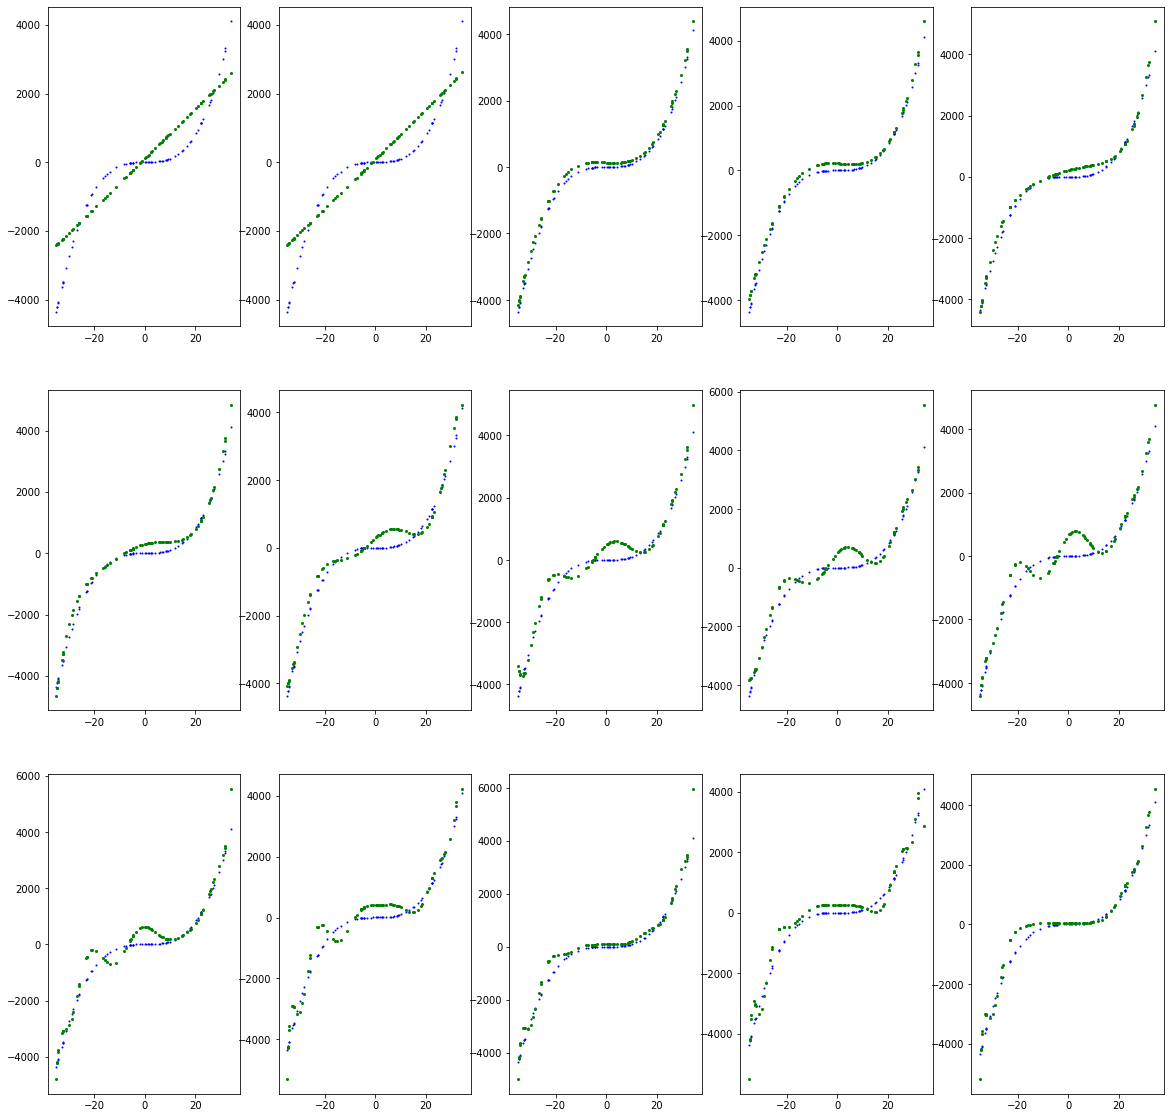

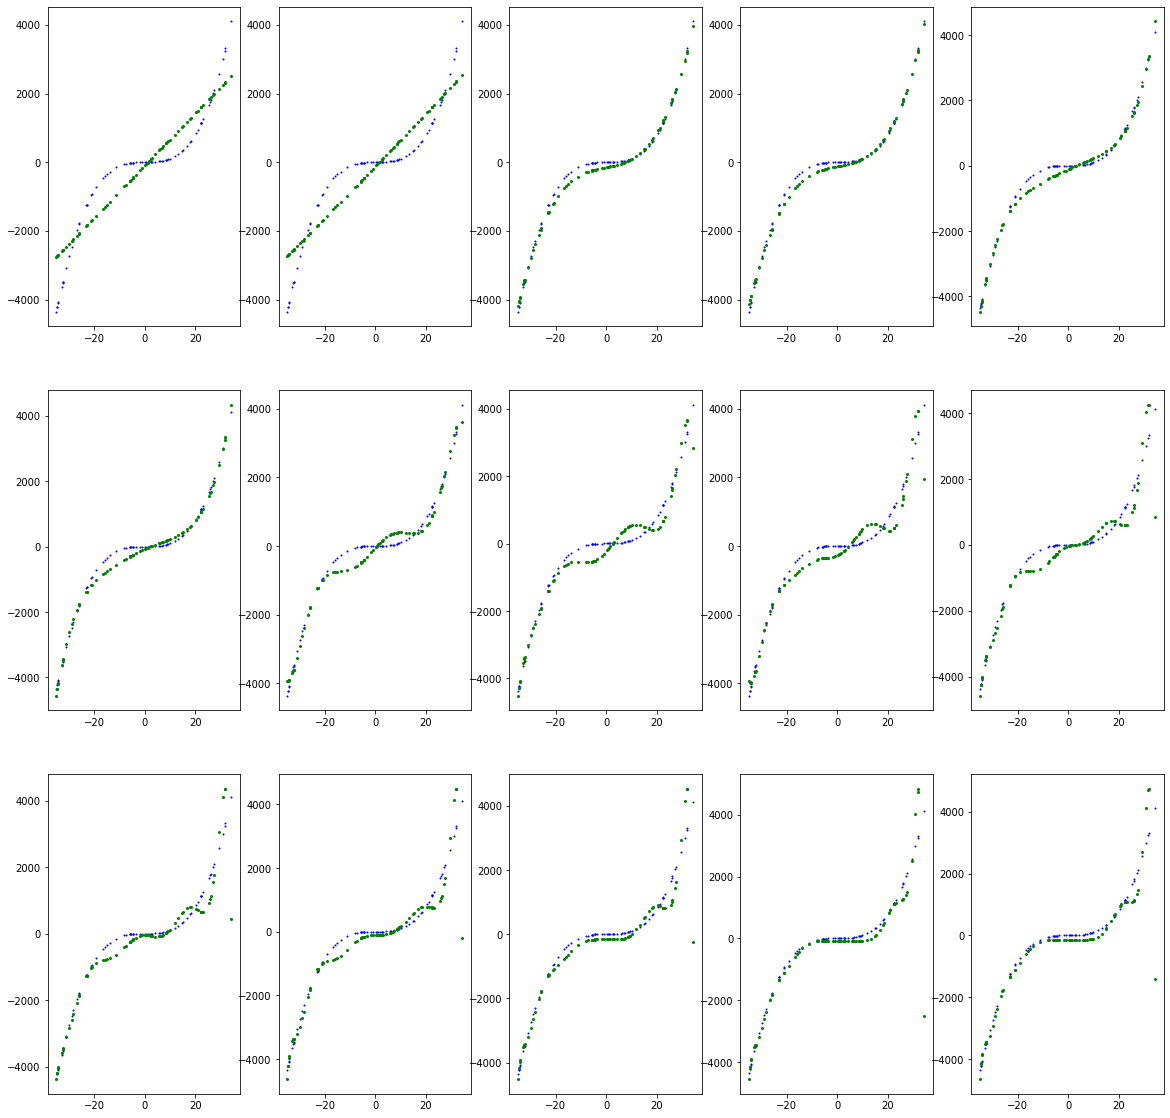

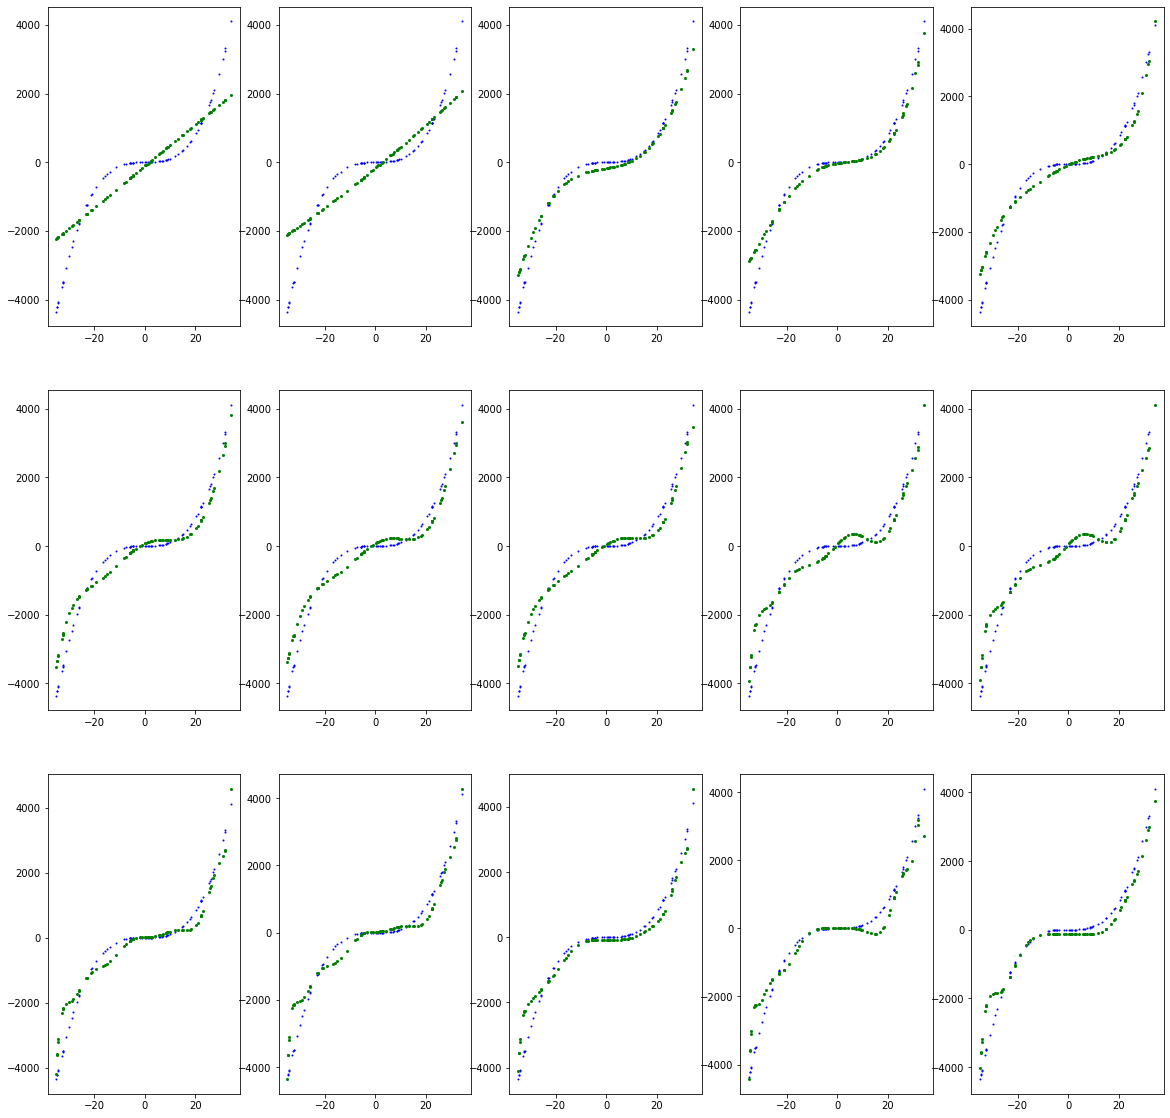

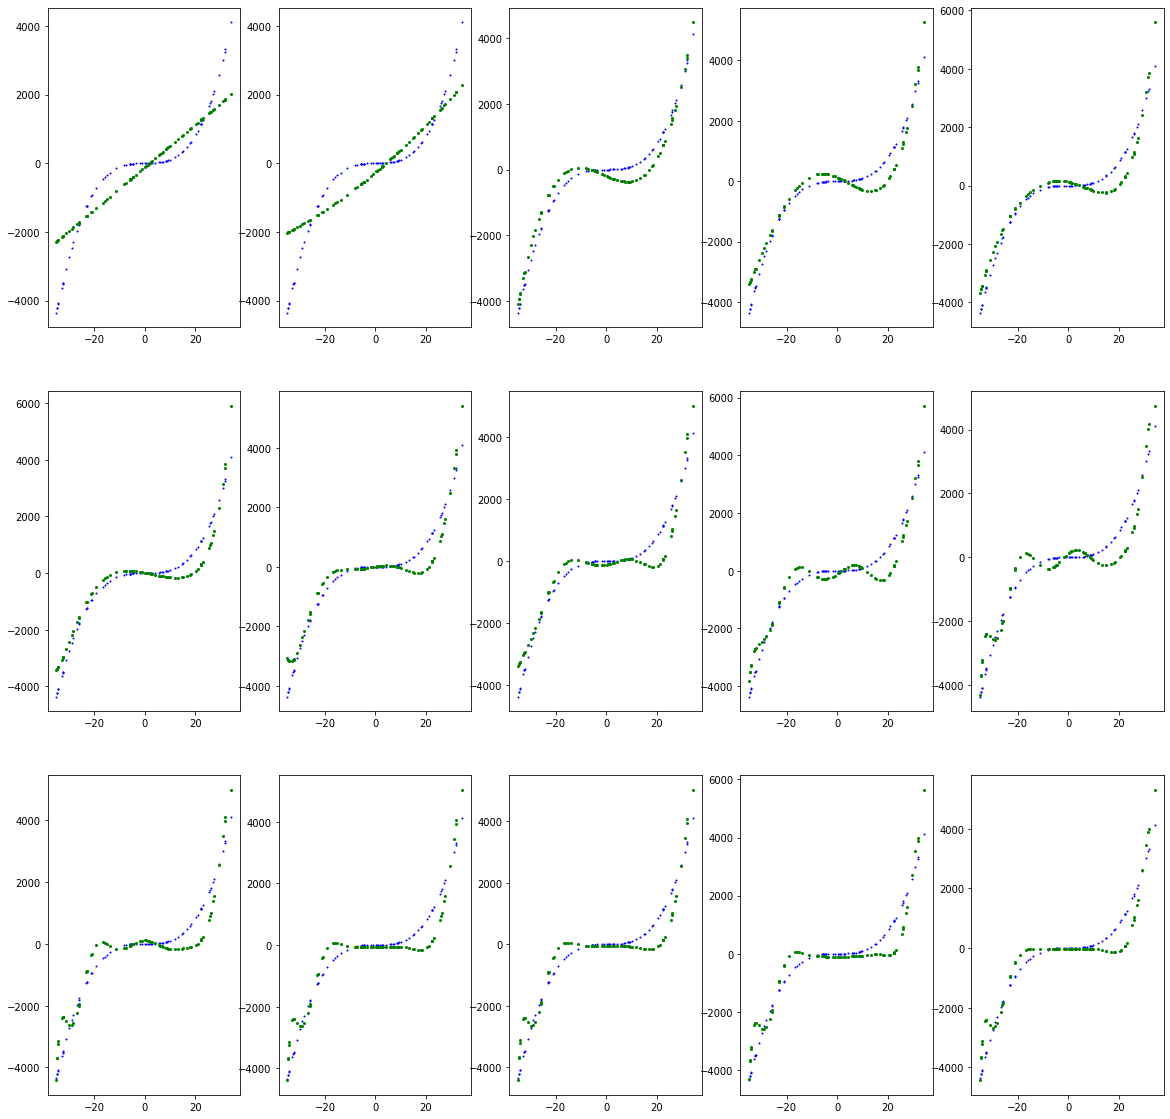

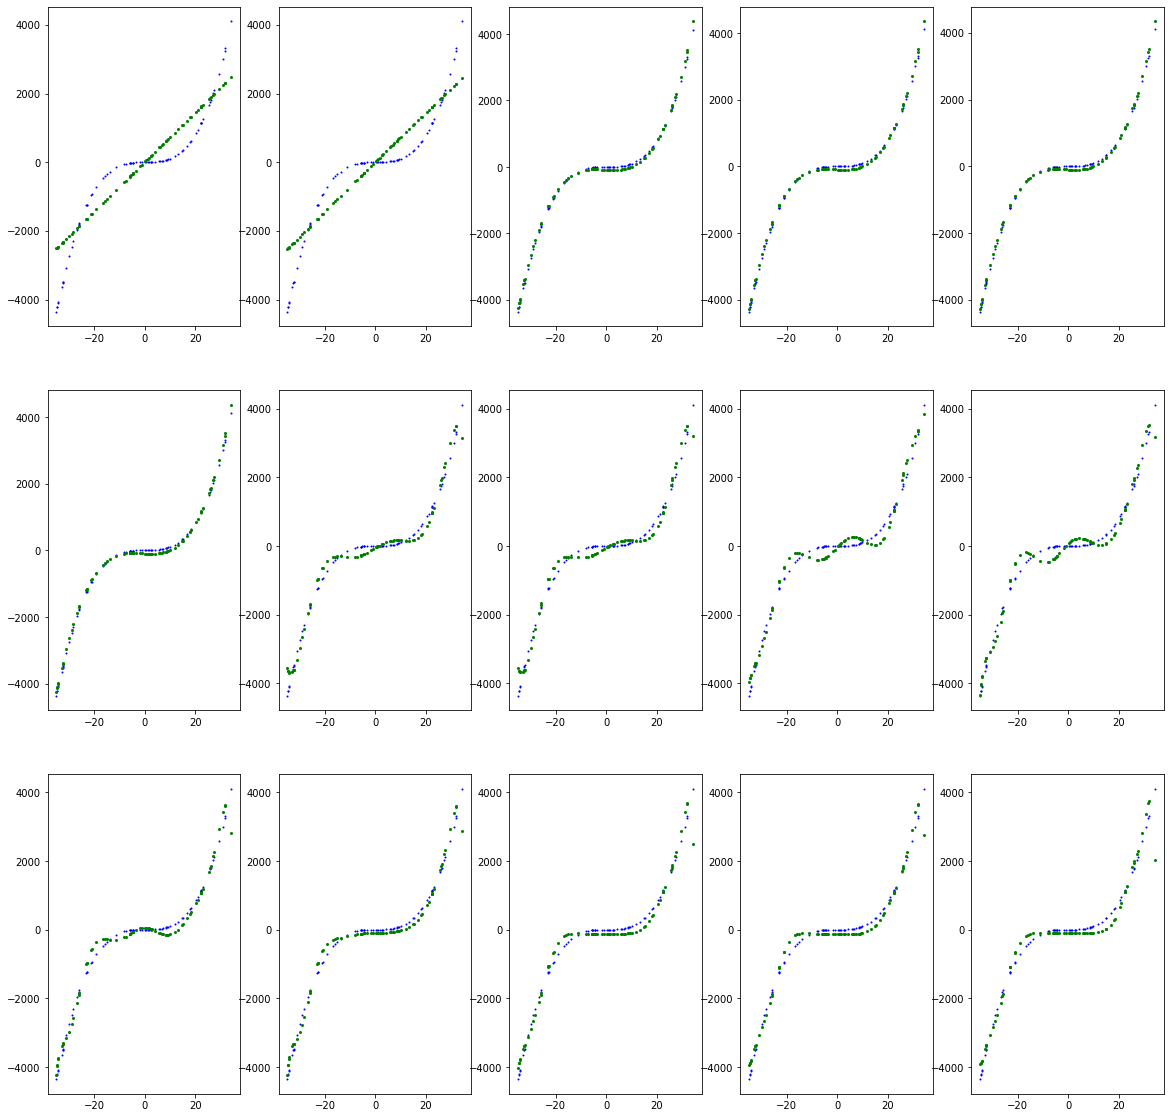

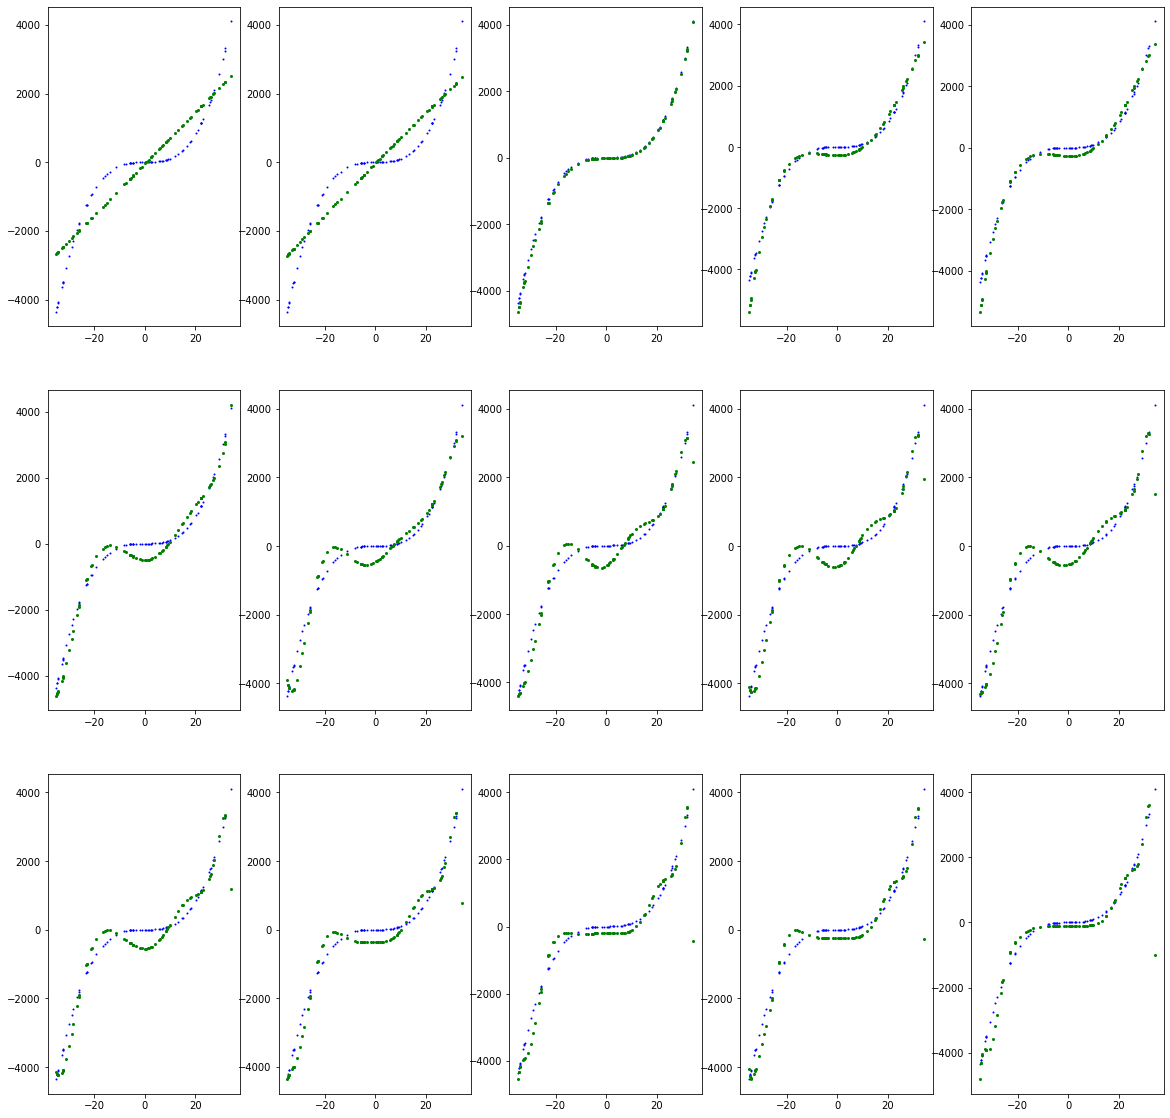

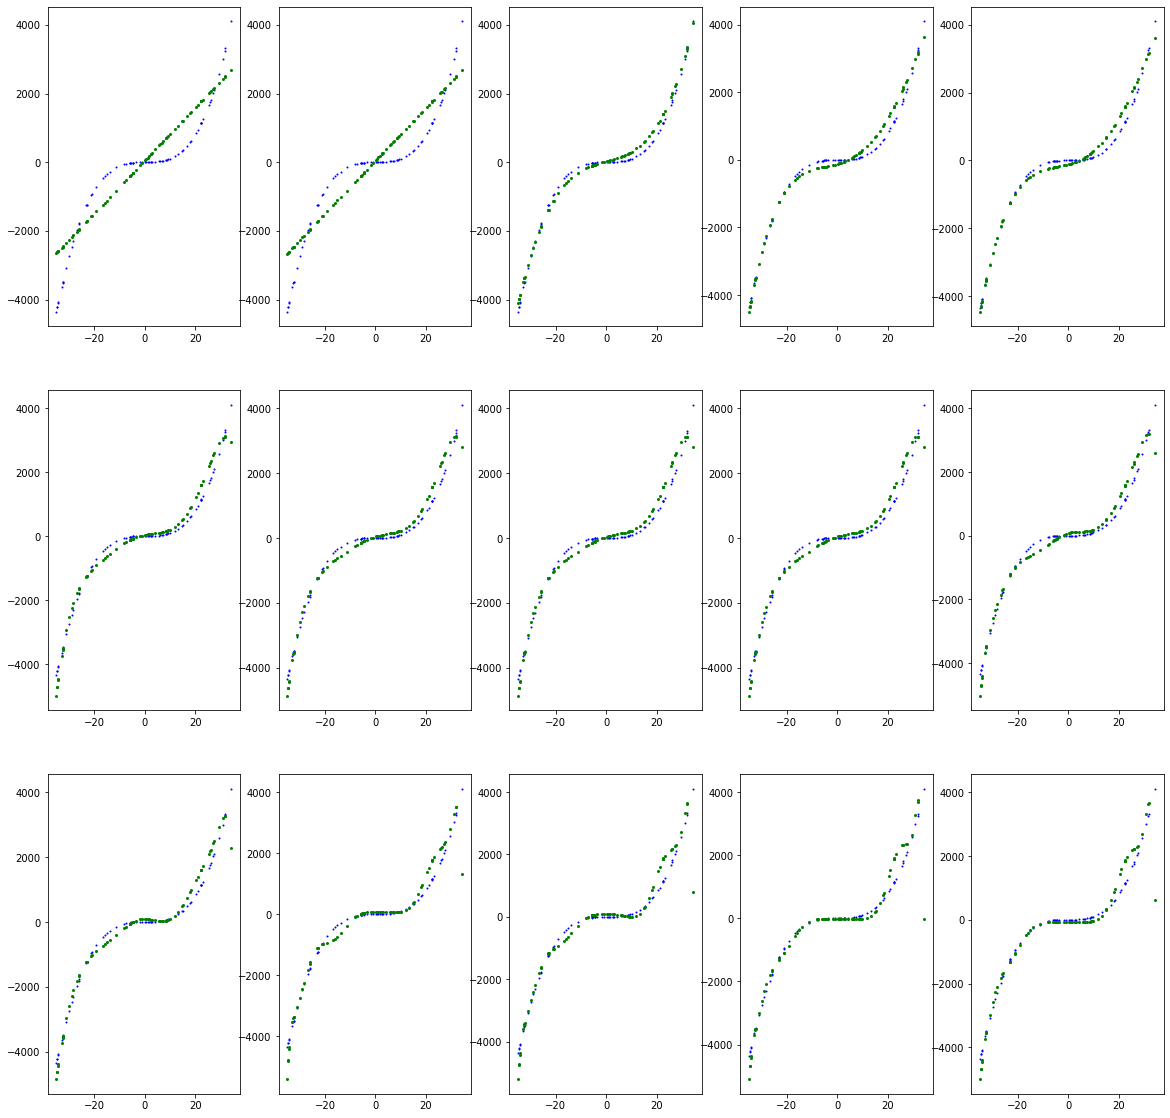

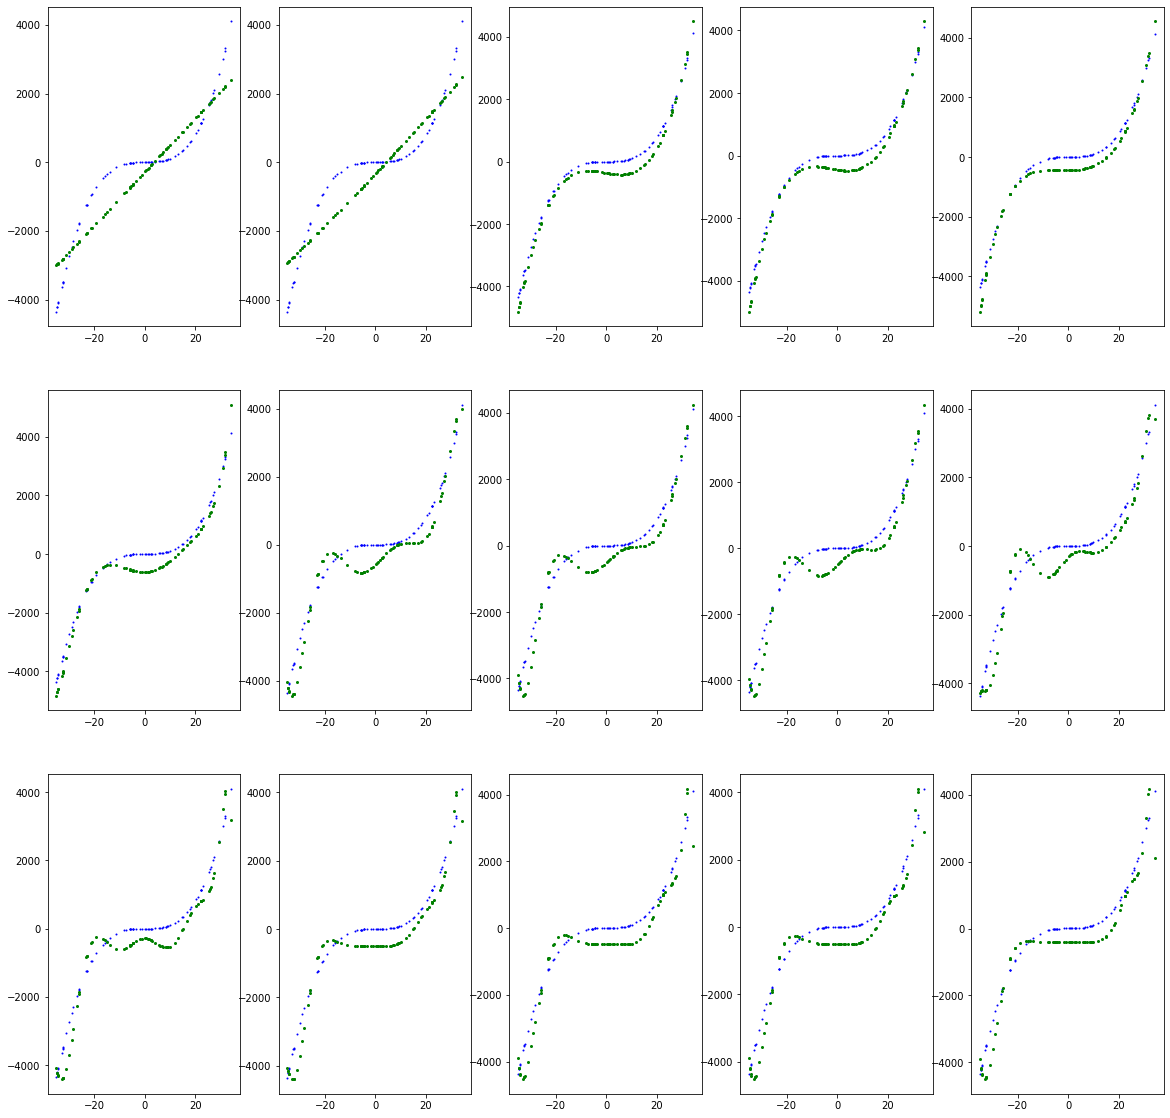

In [392]:
predicted_data_sets = []
# this data set is supposed to store all the predicted data sets, for y.
for i in range(16):
    
    fig, axes = plot.subplots(nrows=3, ncols=5, figsize=(20, 20))
    x = x_training_data_sets[i][:, np.newaxis]
    y = y_training_data_sets[i]
    ar = []
    for degree in range(0, 15):
        model = LinearRegression() #  Now we shall train the linear regression model for the training set
        axes[int(degree/5)][degree % 5].plot(test_x, test_y, 'b.', markersize = 2)
        x_train_poly = PolynomialFeatures(degree+1).fit_transform(x) 
        model.fit(x_train_poly, y) # THis is the step where we train the model, for 
        # since we are told to calculate the variance and bias based on the test set.
        y_predicted = model.predict(PolynomialFeatures(degree+1).fit_transform(test_x[:, np.newaxis]))
        ar.append(y_predicted) # this is a temporary array with which 
        axes[int(degree/5)][degree % 5].plot(test_x[:, np.newaxis], y_predicted, 'g.', markersize=4)
    predicted_data_sets.append(ar)


Now we have clearly seen the models trained with various sets. We shall now use the set of predicted values for each of the model for each degree and use them to calculate the Bias and variance followed by the Irredcuible Error. The variable **predicted_data_sets** has the set of predicted values for the model with test set.
### 

In [393]:
def get_bias(degree):
    temp = []
    for data_set in predicted_data_sets:
        temp.append(data_set[degree])
    
    # Now we are left with models with same degreepolynomial. We shall make the mean of their elements and put then in a new array such that ...
    # The 0th element of the end array is the mean of all the 0th elements in the 16 models.
    # This way of making the means of arrays, is done by numpy with a mean(), with axis = 0.
    # axis = 0 is the condition for making the mean in the way we previously discussed.
    for i in range(len(temp)):
        temp[i] = temp[i] - test_y
    return (np.mean(np.mean(temp, axis =  0)))


def get_variance(degree):
    temp = []
    for data_set in predicted_data_sets:
        temp.append(data_set[degree])
    temp_1 = np.var(temp, axis = 0)
    return np.mean(temp_1) 

def get_mse(degree):
    temp = []
    for data_set in predicted_data_sets:
        temp.append(data_set[degree])
    for i in range(len(temp)):
        temp[i] = np.mean(np.square(temp[i] - test_y))
    return np.mean(temp)
b = []
v = []
mse = []
index = []
for i in range(15):
    b.append(get_bias(i))
    v.append(get_variance(i))
    mse.append(get_mse(i))
    index.append(i)
b = np.array(b)
v = np.array(v)
bias_2 = np.array(b**2)
ire = np.array(mse) - (bias_2 + np.array(v))

print("Bias: ", str(np.mean(b)))
print("Variance: ", str(np.mean(v)))



Bias:  18.65135979466521
Variance:  145695.25179197436


Now we have found the bias, variance, mean square error, irreducible error for all the degrees. Now since, that we have all the things in hand, we shall now begin to answer the questions.

### Task - 2.3: The Irreducible Error

In [394]:
table = dict()
table['Degrees'] = range(1, 16)
table['Irreducible Error'] = ire
table['Bias'] = b
table['Bias^2'] = bias_2
table['Variance'] = v
data_frame = pandas.DataFrame(table)
print(data_frame)

    Degrees  Irreducible Error        Bias        Bias^2       Variance
0         1      470992.281875  152.418840  23231.502640   34537.836109
1         2      462753.127830  150.549850  22665.257439   49468.459910
2         3        1007.460002   -5.089144     25.899386   63029.846671
3         4        1276.308200   -2.032594      4.131439   87970.924389
4         5        1433.827781   -3.283329     10.780247   93132.657704
5         6        5329.689452   -4.092200     16.746104  108885.419737
6         7       21014.261040    3.019892      9.119750  123877.669118
7         8       20932.716958    3.316411     10.998584  134728.013415
8         9       20261.142129    4.304024     18.524625  178441.365241
9        10       27731.666757    2.259500      5.105342  185111.974720
10       11       20564.145501    5.107044     26.081896  213231.532126
11       12       35899.326009    4.212130     17.742039  211284.086193
12       13       24306.706773   -6.890001     47.472108  253121

The Report for Task - 2.3 shall be found in the report.pdf file in the same  directory.

### Task - 2.4: Plotting the Bias^2-Variance Graph

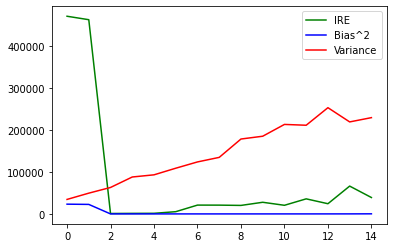

In [395]:
plot.plot(index, ire, color = "green")
plot.plot(index, bias_2, color = "blue")
plot.plot(index, v, color = "red")
plot.legend(["IRE", "Bias^2", "Variance"])
plot.show()